<a href="https://colab.research.google.com/github/souro/misc_google_collab/blob/main/wiki_honorifics_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://dumps.wikimedia.org/{iso_lang_code}wiki/latest/{iso_lang_code}wiki-latest-pages-articles.xml.bz2
#python -m wikiextractor.WikiExtractor Downloads/hiwiki-latest-pages-articles.xml.bz2 --json -o hi_wiki_json
#python -m wikiextractor.WikiExtractor {iso_lang_code}wiki/latest/{iso_lang_code}wiki-latest-pages-articles.xml.bz2 --html-safe HTML_SAFE -o {iso_lang_code}_clean_data/

In [23]:
import json
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# def is_unicode_format(value):
#     return bool(re.search(r'\\u[0-9A-Fa-f]{4}', value))

In [12]:
# def convert_to_readable_text(value):
#     return value.encode().decode('unicode_escape')

In [ ]:
# def process_json_object(json_obj):
#     for key, value in json_obj.items():
#         if isinstance(value, str) and is_unicode_format(value):
#             json_obj[key] = convert_to_readable_text(value)
#         elif isinstance(value, dict):
#             process_json_object(value)
#         elif isinstance(value, list):
#             for item in value:
#                 if isinstance(item, dict):
#                     process_json_object(item)
#     return json_obj

In [ ]:
# input_file = 'sample_data/wiki_00'
# output_file = 'sample_data/wiki_bn1.json'

In [ ]:
# !unzip sample_data/bn_prcsd.zip

In [14]:
input_directory = '/content/drive/MyDrive/Colab Notebooks/AA' #'sample_data/bn/'
# output_directory = 'sample_data/bn_prcsd/'

In [3]:
# input_directory = '/content/drive/MyDrive/Colab Notebooks/bn_wiki_json/' #'sample_data/bn_prcsd/'

In [8]:
bn_pronouns = ["সে", "তারা", "তাঁরা", "ও", "ওরা", "তিনি", "তাহারা", "তার", "তাঁর", "তাদের", "তাঁদের", "ওর", "ওদের", "তাহার", "তাহাদের"]
hi_pronouns = ["वह", "वे", "वो", "उसने", "उसको", "उसे", "उसका", "उसके", "उसकी", "उनका", "उनके", "उनकी", "उनको", "इसका", "इसकी","इसके", "इनका", "इनकी", "इनके", "इनको", "उनसे", "उन्होंने", "उन्हें"]

In [6]:
# def count_pronouns(text, pronouns):
#     counts = {pronoun: text.count(pronoun) for pronoun in pronouns}
#     return counts
def count_pronouns(text, pronouns):
    counts = {}
    for pronoun in pronouns:
        pattern = rf'\b{pronoun}\b'
        counts[pronoun] = len(re.findall(pattern, text))
    return counts

In [ ]:
# data = []
# for filename in os.listdir(input_directory):
#     # if filename.endswith('.json'):
#     filepath = os.path.join(input_directory, filename)
#     input_file = filepath
#     output_file = os.path.join(output_directory, filename)
#     with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
#         for line in infile:
#             json_obj = json.loads(line)

#             title = json_obj.get('title', '')
#             text = json_obj.get('text', '')

#             pronoun_counts = count_pronouns(text, pronouns)
#             pronoun_counts['title'] = title
#             data.append(pronoun_counts)

#             processed_obj = process_json_object(json_obj)
#             json.dump(processed_obj, outfile, ensure_ascii=False)
#             outfile.write('\n')

In [15]:
data = []
for filename in os.listdir(input_directory):
    # if filename.endswith('.json'):
    filepath = os.path.join(input_directory, filename)
    input_file = filepath
    with open(input_file, 'r', encoding='utf-8') as infile:
      for line in infile:
        if line.strip():
          try:
            # print(line)
            json_obj = json.loads(line)

            title = json_obj.get('title', '')
            text = json_obj.get('text', '')

            pronoun_counts = count_pronouns(text, hi_pronouns)
            pronoun_counts['title'] = title
            data.append(pronoun_counts)
          except json.JSONDecodeError as e:
            print(f"Error decoding JSON in file {input_file}, line: {line.strip()}")
            print(e)

In [27]:
# def count_pronouns(text, pronouns):
#     counts = {}
#     for pronoun in pronouns:
#         pattern = rf'\b{pronoun}\b'
#         counts[pronoun] = len(re.findall(pattern, text))
#     return counts
pronouns = hi_pronouns
def extract_sections(text):
    section_pattern = r'\n([^.\n]+)\.\n'
    sections = re.split(section_pattern, text)
    sections_dict = {}

    for i in range(1, len(sections), 2):
        section_name = sections[i].strip()
        section_text = sections[i + 1].strip() if (i + 1) < len(sections) else ''
        sections_dict[section_name] = section_text

    return sections_dict

output_file = 'hi_output.csv' #'bn_output.csv'

data = []

for root, dirs, files in os.walk(input_directory):
    for filename in files:
    # for filename in os.listdir(input_directory):
      # if filename.endswith('.json'):
      filepath = os.path.join(root, filename)

      with open(filepath, 'r', encoding='utf-8') as file:
          for line in file:
              json_obj = json.loads(line)
              title = json_obj.get('title', '')
              text = json_obj.get('text', '')

              sections = extract_sections(text)

              for section_name, section_text in sections.items():
                  pronoun_counts = count_pronouns(section_text, pronouns)
                  pronoun_counts['title'] = f"{title} - {section_name}"
                  data.append(pronoun_counts)

df = pd.DataFrame(data)

for pronoun in pronouns:
    if pronoun not in df.columns:
        df[pronoun] = 0

df = df[['title'] + pronouns]

df.to_csv(output_file, index=False, encoding='utf-8')

In [28]:
df.head()

,title,वह,वे,वो,उसने,उसको,उसे,उसका,उसके,उसकी,...,इसका,इसकी,इसके,इनका,इनकी,इनके,इनको,उनसे,उन्होंने,उन्हें
0,विश्वविद्यालय - इतिहास,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,विश्वविद्यालय - भारत में उच्च-शिक्षा का इतिहास,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,विश्वविद्यालय - विश्वविद्यालयों का प्रशासन,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,विश्वविद्यालय - विभाग एवं उपाधियाँ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,विश्वविद्यालय - समस्याएँ एवं भविष्य,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-dcd06d26afdd>:11: UserWarning: Glyph 2

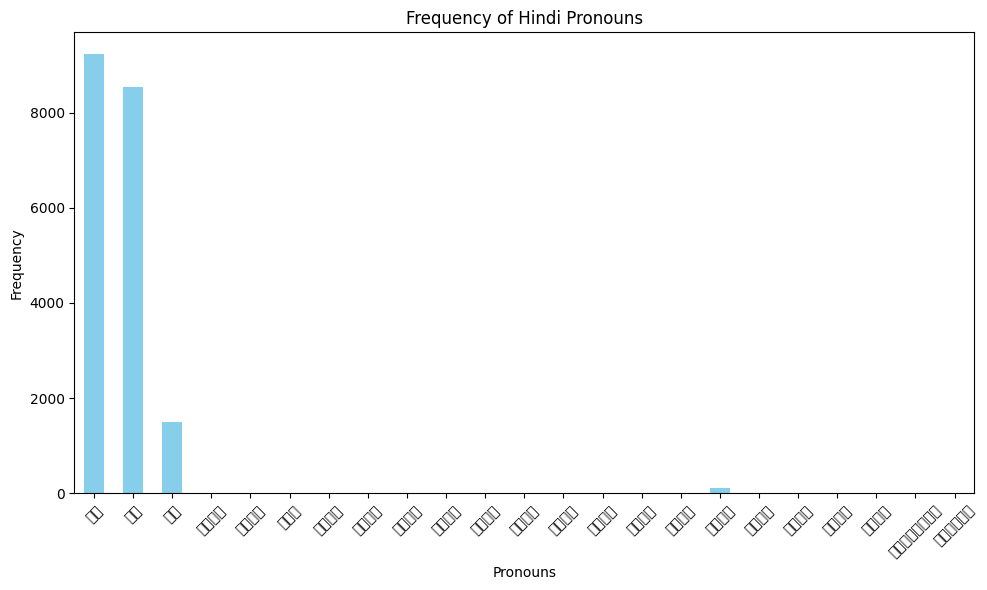

In [22]:
pronoun_frequencies = df.drop(columns=['title']).sum()

plt.figure(figsize=(10, 6))
pronoun_frequencies.plot(kind='bar', color='skyblue')
plt.title('Frequency of Hindi Pronouns')
plt.xlabel('Pronouns')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2433 (\N{BENGALI SIGN CANDRABINDU}) missing from current font.
  plt.tight_layout()
<ipython-input-24-49096fecc22a>:10: UserWarning: Glyph 2451 (\N{BENG

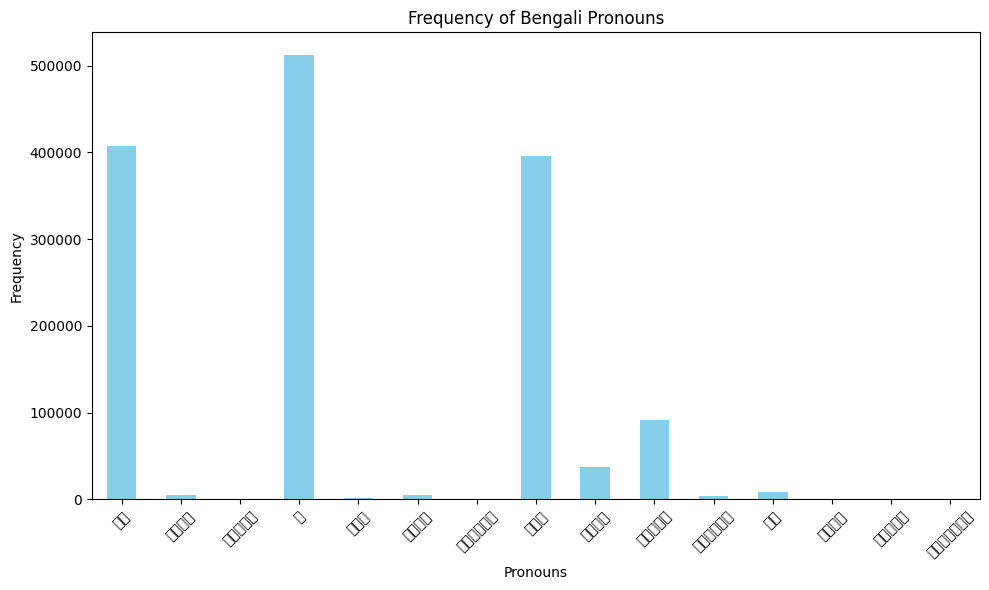

In [24]:
df = pd.read_csv('bn_output.csv')
pronoun_frequencies = df.drop(columns=['title']).sum()

plt.figure(figsize=(10, 6))
pronoun_frequencies.plot(kind='bar', color='skyblue')
plt.title('Frequency of Bengali Pronouns')
plt.xlabel('Pronouns')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# !zip -r sample_data/bn_prcsd.zip sample_data/bn_prcsd/

In [16]:
print(data[:5])

[{'वह': 4, 'वे': 2, 'वो': 1, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका': 0, 'इनकी': 0, 'इनके': 0, 'इनको': 0, 'उनसे': 0, 'उन्होंने': 0, 'उन्हें': 0, 'title': 'विश्वविद्यालय'}, {'वह': 0, 'वे': 0, 'वो': 0, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका': 0, 'इनकी': 0, 'इनके': 0, 'इनको': 0, 'उनसे': 0, 'उन्होंने': 0, 'उन्हें': 0, 'title': 'सिदी'}, {'वह': 0, 'वे': 0, 'वो': 0, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका': 0, 'इनकी': 0, 'इनके': 0, 'इनको': 0, 'उनसे': 0, 'उन्होंने': 0, 'उन्हें': 0, 'title': 'शीदि'}, {'वह': 4, 'वे': 0, 'वो': 0, 'उसने': 0, 'उसको': 0, 'उसे': 0, 'उसका': 0, 'उसके': 0, 'उसकी': 0, 'उनका': 0, 'उनके': 0, 'उनकी': 0, 'उनको': 0, 'इसका': 0, 'इसकी': 0, 'इसके': 0, 'इनका':

In [17]:
freq_output_file = 'sample_data/output_hi.csv'

In [18]:
df = pd.DataFrame(data)

for pronoun in hi_pronouns:
    if pronoun not in df.columns:
        df[pronoun] = 0

df = df[['title'] + hi_pronouns]

df.to_csv(freq_output_file, index=False, encoding='utf-8')

In [19]:
df.head()

,title,वह,वे,वो,उसने,उसको,उसे,उसका,उसके,उसकी,...,इसका,इसकी,इसके,इनका,इनकी,इनके,इनको,उनसे,उन्होंने,उन्हें
0,विश्वविद्यालय,4,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,सिदी,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,शीदि,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,व्यापारी,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,नाविक,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

# # Initialize findspark
# import findspark
# findspark.init()

# # Create a PySpark session
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
# spark

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
sample_data	

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [907 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,221 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,396 kB]


In [ ]:
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession

In [ ]:
from pyspark import SparkContext
num_of_th = 48;
repartition_size = num_of_th*4;
chunk_size = 1000000
sc = SparkContext(master = "local[20]").getOrCreate()
spark = SparkSession(sc)

In [ ]:
spark

In [ ]:
!bunzip2 -d sample_data/bnwiki-latest-pages-articles.xml.bz2

bunzip2: Can't open input file sample_data/bnwiki-latest-pages-articles.xml.bz2: No such file or directory.


In [ ]:
file_rdd = spark.read.text("/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml", wholetext=False)

In [ ]:
file_rdd

DataFrame[value: string]

In [ ]:
file_chunk = file_rdd.take(chunk_size)

In [ ]:
file_rdd.take(10)

[Row(value='<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.11/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.11/ http://www.mediawiki.org/xml/export-0.11.xsd" version="0.11" xml:lang="bn">'),
 Row(value='  <siteinfo>'),
 Row(value='    <sitename>উইকিপিডিয়া</sitename>'),
 Row(value='    <dbname>bnwiki</dbname>'),
 Row(value='    <base>https://bn.wikipedia.org/wiki/%E0%A6%AA%E0%A7%8D%E0%A6%B0%E0%A6%A7%E0%A6%BE%E0%A6%A8_%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A6%BE</base>'),
 Row(value='    <generator>MediaWiki 1.43.0-wmf.14</generator>'),
 Row(value='    <case>first-letter</case>'),
 Row(value='    <namespaces>'),
 Row(value='      <namespace key="-2" case="first-letter">মিডিয়া</namespace>'),
 Row(value='      <namespace key="-1" case="first-letter">বিশেষ</namespace>')]

In [ ]:
myRDD = sc.parallelize(file_chunk)

In [ ]:
myRDD_ = myRDD.repartition(repartition_size)

In [ ]:
elements_parsed = {"title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}


def get_values(i,x,elements_parsed):
    try:
        root = ET.fromstring(x[0]) # can be run over multiple threads by increasing batch size
        for child in root.iter():
            if child.tag == "title":
                elements_parsed["title"].append(child.text)
#                 elements_parsed["count"].append(i)
            if child.tag == "url":
                elements_parsed["url"].append(child.text)
            if child.tag == "abstract":
                elements_parsed["abstract"].append(child.text)
            if child.tag == "anchor":
                elements_parsed["anchor"].append(child.text)
            if child.tag == "link":
                elements_parsed["link"].append(child.text)

    except:
      pass
    # gc.collect()
    return elements_parsed

In [ ]:
# Register the parser with Pysaprk
from pyspark.sql.types import StringType
# pyspark.sql.udf.UDFRegistration.register(name="get_values", f = get_values, returnType=StringType())
from pyspark.sql.functions import udf
get_values_udf = udf(get_values, StringType())

In [ ]:
import time
parsed_records_ini = []; start = time.time()

for idx_,count in enumerate(count_list):
    # 6. Getting one partitioned RDD at a time.
    chunk = myRDD.mapPartitionsWithIndex(lambda i, it: islice(it, 0, count) if i == idx_ else []).collect()




    # 7. Parallelizing it further.
    myRDD_ = sc.parallelize(chunk)
    myRDD_ = myRDD_.repartition(repartition_size)

    #Initiate the dict in which elements will be appended
    elements_parsed = {"count" : [], "title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}

    # 7. Run the job on spark
    elements_parsed = sc.runJob(myRDD_, lambda part: [get_values(i,x,elements_parsed) for i,x in enumerate(part)])




    # 8. Remove duplicate and consilation of parsed records, a hygiene check.

    parsed_records_list = elements_parsed_rm_frindges(elements_parsed)

    # 8. Create a master list in which all the cleaned records will continue appending while all the intermediate variables are reset.
    parsed_records = parsed_records_ini+parsed_records_list
    parsed_records_ini = parsed_records


    # Clean the intermediate RDD
    myRDD_ = sc.emptyRDD()

    #Garbage collection to further save up memory
    gc.collect()

    # Clear Spark cache just in case.
    spark.catalog.clearCache()
    print(idx_, time.time()-start)

In [ ]:
import time
import xml.etree.ElementTree as ET

anch = []; lnk = []; start = time.time(); df = pd.DataFrame(); i = 0
elements_parsed = {"title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}



for event, elem in ET.iterparse("/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"):
    if elem.tag == "title":
        elements_parsed["title"].append(elem.text.split(":")[1])

    if elem.tag == "url":
        elements_parsed["url"].append(elem.text)
    if elem.tag == "abstract":
        elements_parsed["abstract"].append(elem.text)

    if len(elem) > 0:
        for child in elem:
            # print("Child tag:", child.tag)
            if child.tag == "anchor":
                anch.append(child.text)

            if child.tag == "link":
                lnk.append(child.text)


    if i > 0 and elem.tag == "title":
        elements_parsed["anchor"].append(anch)
        elements_parsed["link"].append(lnk)
        anch = []; lnk = []
        if len(df) == 0:
            df["title"] = [elements_parsed["title"][0]]
            df["url"] = [elements_parsed["url"][0]]
            df["abstract"] = [elements_parsed["abstract"][0]]
            df["anchor"] = [elements_parsed["anchor"][0]]
            df["link"] = [elements_parsed["link"][0]]
        if len(df) > 0:
            df.loc[i] = [elements_parsed["title"][0],elements_parsed["url"][0],elements_parsed["abstract"][0],elements_parsed["anchor"][0],elements_parsed["link"][0]]

        elements_parsed.clear()
        elements_parsed = {"title" : [], "url" : [], "abstract" : [], "anchor" : [], "link" : []}
        elements_parsed["title"].append(elem.text)


    i = i+1
    if i > 0 and i % 1000000 == 0:#00
        print(i,"Time taken...", time.time()-start, "seconds..")
    if i == 1000000:
        break

In [ ]:
# import xml.etree.ElementTree as ET

# def print_article_tags(xml_file, article_title):
#     found_article = False
#     for event, elem in ET.iterparse(xml_file, events=("start", "end")):
#         if event == "start" and elem.tag == "page":
#             for child in elem:
#                 if child.tag == "title" and child.text == article_title:
#                     found_article = True
#                     break

#         if found_article and event == "end":
#             if elem.tag != "page":
#                 print(f"Tag: {elem.tag}, Value: {elem.text}")

#             if elem.tag == "page":
#                 break
#             elem.clear()

# xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
# article_to_find = "মুজিবুর রহমান"
# print_article_tags(xml_file_path, article_to_find)

In [ ]:
import xml.etree.ElementTree as ET

def print_first_n_pages(xml_file, n):
    page_count = 0
    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        if event == "start" and elem.tag == "page":
            page_count += 1

        if page_count <= n and event == "end":
            if elem.tag != "page":
                # print(f"Tag: {elem.tag}, Value: {elem.text}")
                print(f"Tag: {elem.tag}")

            if elem.tag == "page":
                elem.clear()

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
num_articles_to_print = 1
print_first_n_pages(xml_file_path, num_articles_to_print)

In [ ]:
import xml.etree.ElementTree as ET

def print_first_page(xml_file):
    in_page = False
    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        if event == "start" and elem.tag == "page":
            in_page = True
            print(1)

        if in_page and event == "end":
            if elem.tag == "page":
                in_page = False
                print(2)
                break
            else:
                print(f"Tag: {elem.tag}, Value: {elem.text}")
                print(3)

        if event == "end" and not in_page:
          print(4)
          elem.clear()

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
print_first_page(xml_file_path)

In [ ]:
# import xml.etree.ElementTree as ET

# def print_first_page(xml_file):
#   in_page = False
#   for event, elem in ET.iterparse(xml_file, events=("start", "end")):
#       print(f"Event: {event}, Tag: {elem.tag}")
#       if event == "start" and elem.tag == "page":
#           print("Starting a page")
#           in_page = True

#       if in_page and event == "end":
#           if elem.tag == "page":
#               print("Ending a page")
#               break
#           else:
#               print(f"Tag: {elem.tag}, Value: {elem.text}")

#       if event == "end" and not in_page:
#           elem.clear()

# xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
# print_first_page(xml_file_path)

import xml.etree.ElementTree as ET

def strip_tag_name(tag):
    return tag.split('}', 1)[1] if '}' in tag else tag

def print_first_page(xml_file):
    in_page = False
    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        tag_name = strip_tag_name(elem.tag)
        print(f"Event: {event}, Tag: {tag_name}")

        if event == "start" and tag_name == "page":
            print("Starting a page")
            in_page = True

        if in_page and event == "end":
            if tag_name == "page":
                print("Ending a page")
                break
            else:
                print(f"Tag: {tag_name}, Value: {elem.text}")

        if event == "end" and not in_page:
            elem.clear()

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
print_first_page(xml_file_path)

Event: start, Tag: mediawiki
Event: start, Tag: siteinfo
Event: start, Tag: sitename
Event: end, Tag: sitename
Event: start, Tag: dbname
Event: end, Tag: dbname
Event: start, Tag: base
Event: end, Tag: base
Event: start, Tag: generator
Event: end, Tag: generator
Event: start, Tag: case
Event: end, Tag: case
Event: start, Tag: namespaces
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag: namespace
Event: start, Tag: namespace
Event: end, Tag:

In [ ]:
import xml.etree.ElementTree as ET

def strip_tag_name(tag):
    """Helper function to strip the namespace from the tag name"""
    return tag.split('}', 1)[1] if '}' in tag else tag

def print_page_by_title(xml_file, title_to_find):
    in_page = False
    current_title = None

    for event, elem in ET.iterparse(xml_file, events=("start", "end")):
        tag_name = strip_tag_name(elem.tag)

        if event == "start" and tag_name == "page":
            in_page = True

        if in_page and event == "end":
            if tag_name == "title":
                current_title = elem.text
                if current_title == title_to_find:
                    print(f"Found page: {current_title}")

            if current_title == title_to_find:
                if tag_name == "page":
                    print(f"End of page: {current_title}")
                    break
                else:
                    print(f"Tag: {tag_name}, Value: {elem.text}")
                    # print(f"Tag: {tag_name}")

            elem.clear()

        if event == "end" and tag_name == "page":
            in_page = False

xml_file_path = "/content/drive/MyDrive/Colab Notebooks/bnwiki-latest-pages-articles.xml"
title_to_find = "অমিতাভ বচ্চন"
print_page_by_title(xml_file_path, title_to_find)

Found page: অমিতাভ বচ্চন
Tag: title, Value: অমিতাভ বচ্চন
Tag: ns, Value: 0
Tag: id, Value: 3123
Tag: id, Value: 7356177
Tag: parentid, Value: 7356176
Tag: timestamp, Value: 2024-05-02T22:09:41Z
Tag: username, Value: তুষার কান্তি ষন্নিগ্রহী
Tag: id, Value: 421889
Tag: contributor, Value: 
        
Tag: comment, Value: /* গুরুত্বপূর্ণ ভূমিকায় প্রত্যাবর্তন: ২০০০ থেকে সাম্প্রতিক */বানান সংশোধন করলাম -তুষারকান্তি ষন্নিগ্রহী
Tag: origin, Value: 7356177
Tag: model, Value: wikitext
Tag: format, Value: text/x-wiki
Tag: text, Value: {{তথ্যছক ব্যক্তি
| module             = {{Infobox officeholder | embed = yes
   | constituency1 = [[Allahabad Lok Sabha constituency|এলাহাবাদ]]
   | office1 = [[সংসদ সদস্য, লোকসভা]]
   | predecessor1 = [[জনেশ্বর মিশ্র]]
   | successor1 = [[ভিপি সিং]]
   | term_start1 = ৩১ ডিসেম্বর ১৯৮৪
   | term_end1 = জুলাই ১৯৮৭
   || party              = [[ভারতীয় জাতীয় কংগ্রেস]] (১৯৮৪–১৯৮৭)<ref>{{cite web | url=https://www.deccanherald.com/amp/content/535211/unlike-amitabh-wont-

In [1]:
from itertools import product

categories = {
    "Human/Animal/Non-Human": ["Human", "Animal", "Non-Human"],
    "Kid/Adult/Old/Ageless": ["Kid", "Adult", "Old", "Ageless"],
    "Historical/Modern/Future": ["Historical", "Modern", "Future"],
    "Highly Famous/Moderately Famous/Infamous/Controversial": ["Highly Famous", "Moderately Famous", "Infamous", "Controversial"],
    "Male/Female/Gender Neutral": ["Male", "Female", "Gender Neutral"],
    "Native/Exotic": ["Native", "Exotic"],
    "Mythological": ["Yes", "No"],
    "Dead/Alive": ["Dead", "Alive"],
    "Sports/Political/Film/Science/SocialWorker/AwardWinner/Freedom Fighter/Deity/Soldier/Criminal": ["Sports", "Political", "Film", "Science", "SocialWorker", "AwardWinner", "Freedom Fighter", "Deity", "Soldier", "Criminal"],
    "Real/Fictional/Mythological": ["Real", "Fictional", "Mythological"]
}

combinations = list(product(*categories.values()))

def format_combination(combination):
    return {
        "Human/Animal/Non-Human": combination[0],
        "Kid/Adult/Old/Ageless": combination[1],
        "Historical/Modern/Future": combination[2],
        "Highly Famous/Moderately Famous/Infamous/Controversial": combination[3],
        "Male/Female/Gender Neutral": combination[4],
        "Native/Exotic": combination[5],
        "Mythological": combination[6],
        "Dead/Alive": combination[7],
        "Sports/Political/Film/Science/SocialWorker/AwardWinner/Freedom Fighter/Deity/Soldier/Criminal": combination[8],
        "Real/Fictional/Mythological": combination[9]
    }

formatted_combinations = [format_combination(c) for c in combinations]

import pandas as pd

df_combinations = pd.DataFrame(formatted_combinations)
file_path = 'combinations.csv'
df_combinations.to_csv(file_path, index=False)

In [1]:
import requests

url = "http://10.127.105.180:8000/v1/chat/completions"
payload = {
    "model": "llama-3.1",
    "messages": [{"role": "user", "content": "What is the capital of India?"}],
    "max_tokens": 30,
    "top_p": 0.9,
    "temperature": 0.9
}
response = requests.post(url, json=payload)
print(response.json())

ConnectTimeout: HTTPConnectionPool(host='10.127.105.180', port=8000): Max retries exceeded with url: /v1/chat/completions (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7b9f5418fbe0>, 'Connection to 10.127.105.180 timed out. (connect timeout=None)'))

In [7]:
# import pickle

# data_list = [
#     {"name": "Souro", "id": 1},
#     {"name": "Sourabh", "id": 2},
#     {"name": "Arif", "age": 3}
# ]

# with open('data.pkl', 'ab') as f:
#     for data in data_list:
#         pickle.dump(data, f)

# with open('data.pkl', 'rb') as f:
#     while True:
#         try:
#             data = pickle.load(f)
#             print(data)
#         except EOFError:
#             break

{'name': 'Souro', 'id': 1}
{'name': 'Sourabh', 'id': 2}
{'name': 'Arif', 'age': 3}


In [5]:
import requests
import urllib.parse

def get_english_wikipedia_link(bn_wiki_url):
    encoded_title = bn_wiki_url.split("/")[-1]
    title = urllib.parse.unquote(encoded_title)

    endpoint = "https://bn.wikipedia.org/w/api.php"

    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "langlinks",
        "lllang": "en"
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    for page_id, page_data in pages.items():
        if "langlinks" in page_data:
            for langlink in page_data["langlinks"]:
                if langlink["lang"] == "en":
                    formatted_title = langlink['*'].replace(" ", "_")
                    return f"https://en.wikipedia.org/wiki/{formatted_title}"

    return None

bn_wiki_url = "https://bn.wikipedia.org/wiki/%E0%A6%B8%E0%A6%A4%E0%A7%8D%E0%A6%AF%E0%A6%9C%E0%A6%BF%E0%A7%8E_%E0%A6%B0%E0%A6%BE%E0%A6%AF%E0%A6%BC"
en_wiki_url = get_english_wikipedia_link(bn_wiki_url)
print(f"English Wikipedia link: {en_wiki_url}")

English Wikipedia link: https://en.wikipedia.org/wiki/Satyajit_Ray


In [6]:
# !pip install wikipedia-api

In [14]:
import wikipediaapi

def get_introductory_text(wiki_url):
    # Set up a custom User-Agent string
    user_agent = "WikiIntroExtractor/1.0 (Sourabrata Mukherjee; soura1990@gmail.com)"

    # Create a Wikipedia API object for Bengali with a custom User-Agent
    wiki_wiki = wikipediaapi.Wikipedia('bn', headers={'User-Agent': user_agent})

    # Extract the title from the URL and decode it
    title = wiki_url.split("/")[-1]
    # print(title)
    title = urllib.parse.unquote(title)
    # print(title)

    # Get the page
    page = wiki_wiki.page(title)

    if page.exists():
        # The introductory text is typically the first section of the article
        intro_text = page.text.split("\n\n")[0]
        return intro_text
    else:
        return "Page not found."

# Example usage
bn_wiki_url = "https://bn.wikipedia.org/wiki/%E0%A6%B8%E0%A6%A4%E0%A7%8D%E0%A6%AF%E0%A6%9C%E0%A6%BF%E0%A7%8E_%E0%A6%B0%E0%A6%BE%E0%A6%AF%E0%A6%BC"
intro_text = get_introductory_text(bn_wiki_url)
print(intro_text)


%E0%A6%B8%E0%A6%A4%E0%A7%8D%E0%A6%AF%E0%A6%9C%E0%A6%BF%E0%A7%8E_%E0%A6%B0%E0%A6%BE%E0%A6%AF%E0%A6%BC
সত্যজিৎ_রায়
Satyajit Ray   (Bengali pronunciation: [ˈʃotːodʒit ˈrae̯] ; 2 May 1921 – 23 April 1992) was an Indian director, screenwriter, documentary filmmaker, author, essayist, lyricist, magazine editor, illustrator, calligrapher, and composer. Ray is widely considered one of the greatest and most influential film directors in the history of cinema. He is celebrated for works including The Apu Trilogy (1955–1959), The Music Room (1958), The Big City (1963), Charulata (1964), and the Goopy–Bagha trilogy (1969–1992).[a]
Ray was born in Calcutta to author Sukumar Ray and Suprabha Ray. Starting his career as a commercial artist, Ray was drawn into independent film-making after meeting French filmmaker Jean Renoir and viewing Vittorio De Sica's Italian neorealist film Bicycle Thieves (1948) during a visit to London.
Ray directed 36 films, including feature films, documentaries, and shorts

In [17]:
import requests

def get_introductory_text_bengali(wiki_url):
    user_agent = "WikiIntroExtractor/1.0 (Sourabarata Mukherjee; soura1990@gmail.com)"

    encoded_title = wiki_url.split("/")[-1]
    title = requests.utils.unquote(encoded_title)

    url = f"https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "extracts",
        "exintro": True,
        "explaintext": True,
        "titles": title,
        "format": "json",
    }
    headers = {
        "User-Agent": user_agent
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    pages = data["query"]["pages"]
    page = next(iter(pages.values()))
    if "extract" in page:
        return page["extract"]
    else:
        return "Page not found."

bn_wiki_url = "https://bn.wikipedia.org/wiki/%E0%A6%B8%E0%A6%A4%E0%A7%8D%E0%A6%AF%E0%A6%9C%E0%A6%BF%E0%A7%8E_%E0%A6%B0%E0%A6%BE%E0%A6%AF%E0%A6%BC"
intro_text = get_introductory_text_bengali(bn_wiki_url)
print(intro_text)

সত্যজিৎ রায় (২ মে ১৯২১ – ২৩ এপ্রিল ১৯৯২) ছিলেন একজন ভারতীয় চলচ্চিত্র নির্মাতা, চিত্রনাট্যকার, শিল্প নির্দেশক, সংগীত পরিচালক এবং লেখক। তাঁকে বিংশ শতাব্দীর অন্যতম শ্রেষ্ঠ চলচ্চিত্র নির্মাতাদের একজন হিসেবে গণ্য করা হয়। সত্যজিতের জন্ম কলকাতা শহরে সাহিত্য ও শিল্প সমাজে খ্যাতনামা রায় পরিবারে। তার পূর্বপুরুষের ভিটা ছিল তৎকালীন ব্রিটিশ ভারতের ময়মনসিংহ জেলার কিশোরগঞ্জে মহকুমার (বর্তমানে বাংলাদেশ) কটিয়াদী উপজেলার মসূয়া গ্রামে। তিনি কলকাতার প্রেসিডেন্সি কলেজ ও শান্তিনিকেতনে রবীন্দ্রনাথ ঠাকুর প্রতিষ্ঠিত বিশ্বভারতী বিশ্ববিদ্যালয়ে পড়াশোনা করেন। সত্যজিতের কর্মজীবন একজন বাণিজ্যিক চিত্রকর হিসেবে শুরু হলেও প্রথমে কলকাতায় ফরাসি চলচ্চিত্র নির্মাতা জঁ রনোয়ারের সাথে সাক্ষাৎ ও পরে লন্ডন শহরে সফররত অবস্থায় ইতালীয় নব্য বাস্তবতাবাদী চলচ্চিত্র লাদ্রি দি বিচিক্লেত্তে (ইতালীয়: Ladri di biciclette, বাইসাইকেল চোর) দেখার পর তিনি চলচ্চিত্র নির্মাণে উদ্বুদ্ধ হন।
চলচ্চিত্র নির্মাতা হিসেবে সত্যজিৎ ছিলেন বহুমুখী এবং তার কাজের পরিমাণ বিপুল। তিনি ৩৭টি পূর্ণদৈর্ঘ্য কাহিনীচিত্র, প্রামাণ্যচিত্র ও স্বল্পদৈর্ঘ্য চল

In [18]:
import requests

def get_bengali_wikipedia_articles(category="সকল_পৃষ্ঠার_নাম"):
    user_agent = "WikiIntroExtractor/1.0 (Sourabarata Mukherjee; soura1990@gmail.com)"
    url = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "list": "categorymembers",
        "cmtitle": f"Category:{category}",
        "cmlimit": 10,  # You can increase this number for more results
        "format": "json",
    }
    headers = {
        "User-Agent": user_agent
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    articles = []
    for page in data['query']['categorymembers']:
        article_title = page['title']
        article_metadata = get_article_metadata(article_title)
        articles.append({
            "title": article_title,
            "metadata": article_metadata
        })

    return articles

def get_article_metadata(title):
    user_agent = "WikiIntroExtractor/1.0 (Sourabarata Mukherjee; soura1990@gmail.com)"

    url = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "titles": title,
        "prop": "pageprops|pageterms",
        "format": "json",
    }
    headers = {
        "User-Agent": user_agent
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    page = next(iter(data['query']['pages'].values()))
    metadata = {
        "description": page.get("terms", {}).get("description", []),
        "type": page.get("pageprops", {}).get("wikibase_item")
    }

    return metadata

articles = get_bengali_wikipedia_articles("সকল_পৃষ্ঠার_নাম")
print('articles', articles)
for article in articles:
    print(article["title"], article["metadata"])


articles []


In [21]:
import requests

def list_bengali_pages():
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "list": "allpages",
        "aplimit": "max"  # Change this value to get more or fewer pages
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("allpages", [])
    return [page["title"] for page in pages]

# Example usage
page_titles = list_bengali_pages()
print(len(page_titles))
print(page_titles)  # Print the first 10 page titles


500
['"Fake" Diesel', '"Machine Gun" Karl Anderson', '"May 19" Kane', '"Mean" Mark Callous', '"Rowdy" Ronda Rousey', '"The Big Show" Paul Wight', '"The Fiend" Bray Wyatt', '"The Punisher" Dice Morgan', '"Wow" signal', '"আর্ট ডেকো"', '"দ্য ডিমোন" ফিন ব্যালর', '"দ্য পানিশার" ডাইস মরগান', '"দ্য ফিয়েন্ড" ব্রেই ওয়্যাট', '"দ্য বিগ শো" পল ওয়াইট', '"পানিশার" ডাইস মরগান', '"পানিশার" ডাইস মর্গান', '"পানিশার" ডিস মরগান', '"পানিশার" ডিস মর্গান', '"ফেক" ডিজেল', '"বিলিভিং উইমেন" ইন ইসলাম (বই)', '"মিন" মার্ক ক্যালোয়াস', '"মে ১৯" কেইন', '"মেশিন গান" কার্ল অ্যান্ডারসন', '"মেশিন গান" কার্ল এন্ডারসন', '"রাউডি" রন্ডা রাউজি', '"রাউডি" রন্ডা রাউসি', '"রাউডি" রন্ডা রাওজি', '"রাউডি" রন্ডা রাওসি', '"রাউডি" রোন্ডা রাউজি', '"রাউডি" রোন্ডা রাউসি', '"রাউডি" রোন্ডা রাওজি', '"রাউডি" রোন্ডা রাওসি', '"রাওডি" রন্ডা রাউসি', '"রাওডি" রন্ডা রাওজি', '"রাওডি" রন্ডা রাওসি', '"রাওডি" রোন্ডা রাউজি', '"রাওডি" রোন্ডা রাউসি', '"রাওডি" রোন্ডা রাওজি', '"রাওডি" রোন্ডা রাওসি', '"হ্যাপি" ইন গালোসেস', '"হ্যালো, ওয়ার্ল্ড!" প্রোগ্রা

In [23]:
def get_page_metadata(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "categories"
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    print(pages.items())
    for page_id, page_data in pages.items():
        categories = [cat["title"] for cat in page_data.get("categories", [])]
        return {
            "title": title,
            "categories": categories
        }

    return {"title": title, "categories": []}

metadata = get_page_metadata("সত্যজিৎ_রায়")
# print(metadata)

dict_items([('2459', {'pageid': 2459, 'ns': 0, 'title': 'সত্যজিৎ রায়', 'categories': [{'ns': 14, 'title': 'বিষয়শ্রেণী:অকার্যকর বহিঃসংযোগ সহ সমস্ত নিবন্ধ'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:আকিরা কুরোসাওয়া পুরস্কার বিজয়ী'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:আনন্দ পুরস্কার বিজয়ী'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:ইংরেজি ভাষার বহিঃসংযোগ থাকা নিবন্ধ'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:ইতালীয় ভাষার লেখা থাকা নিবন্ধ'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:ইন্টারনেট আর্কাইভ সংযোগ সহ নিবন্ধ'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:উদ্ধৃতি শৈলী রক্ষণাবেক্ষণ: অচেনা ভাষা'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:এইচকার্ডের সাথে নিবন্ধসমূহ'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:একাডেমি সম্মানসূচক পুরস্কার বিজয়ী'}, {'ns': 14, 'title': 'বিষয়শ্রেণী:ওয়েব আর্কাইভ টেমপ্লেটে ওয়েব্যাক সংযোগ'}]})])


In [24]:
def get_page_properties(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "info"
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    metadata = {}
    for page_id, page_data in pages.items():
        metadata["title"] = page_data.get("title", "Unknown")
        metadata["page_id"] = page_id
        metadata["revision_id"] = page_data.get("lastrevid", "Unknown")
        metadata["length"] = page_data.get("length", "Unknown")

    return metadata

# Example usage
page_properties = get_page_properties("সত্যজিৎ_রায়")
print(page_properties)

{'title': 'সত্যজিৎ রায়', 'page_id': '2459', 'revision_id': 7377004, 'length': 145287}


In [25]:
def get_page_content_and_sections(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "revisions",
        "rvprop": "content",
        "rvlimit": 1
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    for page_id, page_data in pages.items():
        revisions = page_data.get("revisions", [{}])
        content = revisions[0].get("*", "No content found")
        return {
            "title": title,
            "content": content
        }

    return {"title": title, "content": "No content found"}

# Example usage
page_content = get_page_content_and_sections("সত্যজিৎ_রায়")
print(page_content["content"])

{{নির্বাচিত নিবন্ধ}}
{{তথ্যছক ব্যক্তি
| honorific-prefix = '''[[ভারতরত্ন]]'''
| name               = সত্যজিৎ রায়
| image              = Satyajit Ray in New York (cropped).jpg
| caption            = ১৯৮১ সালে [[নিউ ইয়র্ক (শহর)|নিউ ইয়র্কে]] সত্যজিৎ
| birth_date         = {{জন্ম তারিখ|df=yes|১৯২১|৫|২}}
| birth_place        = [[কলকাতা]], [[বাংলা|বেঙ্গল প্রেসিডেন্সি]], [[ব্রিটিশ রাজ|ব্রিটিশ ভারত]] (বর্তমানে [[ভারত]])
| death_date         = {{মৃত্যু তারিখ ও বয়স|df=yes|১৯৯২|৪|২৩|১৯২১|৫|২}}
| death_place        = কলকাতা, [[পশ্চিমবঙ্গ]], ভারত
| death_cause        = হৃদযন্ত্রের জটিলতা
| resting_place      = ভারত
| monuments          = [[সল্ট লেক]], কলকাতা<ref name="statue">{{সংবাদ উদ্ধৃতি |লেখক1=টিটি ব্যুরো |শিরোনাম=A statue on every island |ইউআরএল=https://www.telegraphindia.com/states/west-bengal/a-statue-on-every-island/cid/1469635 |সংগ্রহের-তারিখ=১০ ফেব্রুয়ারি ২০১৯ |প্রকাশক=[[দ্য টেলিগ্রাফ (কলকাতা)|দ্য টেলিগ্রাফ]] |তারিখ=৩ জুলাই ২০১৫ |অবস্থান=পশ্চিমবঙ্গ}}</ref>
| nationality        = [[ভ

In [26]:
def get_page_links(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "links",
        "pllimit": "max"  # Change this to a specific number if needed
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    links = []
    for page_id, page_data in pages.items():
        links = [link["title"] for link in page_data.get("links", [])]

    return links

# Example usage
page_links = get_page_links("সত্যজিৎ_রায়")
print(page_links)

['15th National Film Awards', '16th National Film Awards', '17th National Film Awards', '18th National Film Awards', '19th National Film Awards', '20th National Film Awards', '21st National Film Awards', '22nd National Film Awards', '23rd National Film Awards', '24th National Film Awards', '25th National Film Awards', '26th National Film Awards', '27th National Film Awards', '28th National Film Awards', '29th National Film Awards', '30th National Film Awards', '31st National Film Awards', '32nd National Film Awards', '33rd National Film Awards', '34th National Film Awards', '35th National Film Awards', '36th National Film Awards', '37th National Film Awards', '38th National Film Awards', '39th National Film Awards', '40th National Film Awards', '41st National Film Awards', '42nd National Film Awards', '43rd National Film Awards', '44th National Film Awards', '45th National Film Awards', '46th National Film Awards', '47th National Film Awards', '48th National Film Awards', '49th Nationa

In [27]:
def get_revision_details(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "revisions",
        "rvprop": "timestamp|user|comment",
        "rvlimit": 1
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    for page_id, page_data in pages.items():
        revisions = page_data.get("revisions", [{}])
        revision = revisions[0]
        return {
            "title": title,
            "timestamp": revision.get("timestamp", "Unknown"),
            "user": revision.get("user", "Unknown"),
            "comment": revision.get("comment", "No comment")
        }

    return {"title": title, "timestamp": "Unknown", "user": "Unknown", "comment": "No comment"}

# Example usage
revision_details = get_revision_details("সত্যজিৎ_রায়")
print(revision_details)

{'title': 'সত্যজিৎ_রায়', 'timestamp': '2024-05-16T07:08:23Z', 'user': 'Das bangla', 'comment': ''}


In [30]:
import requests

def get_all_page_titles_and_ids():
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "list": "allpages",
        "aplimit": "max",  # You may need to paginate if there are too many pages
        "apnamespace": 0  # Get only main namespace (0) pages
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("allpages", [])
    print(len(pages))
    result = [{"title": page["title"], "page_id": page["pageid"]} for page in pages]

    return result

# Example usage
page_info = get_all_page_titles_and_ids()
for page in page_info[:10]:  # Print the first 10 for example
    print(page)

500
{'title': '"Fake" Diesel', 'page_id': 898376}
{'title': '"Machine Gun" Karl Anderson', 'page_id': 882931}
{'title': '"May 19" Kane', 'page_id': 884150}
{'title': '"Mean" Mark Callous', 'page_id': 885066}
{'title': '"Rowdy" Ronda Rousey', 'page_id': 915140}
{'title': '"The Big Show" Paul Wight', 'page_id': 882383}
{'title': '"The Fiend" Bray Wyatt', 'page_id': 893533}
{'title': '"The Punisher" Dice Morgan', 'page_id': 885051}
{'title': '"Wow" signal', 'page_id': 143485}
{'title': '"আর্ট ডেকো"', 'page_id': 1388086}


In [32]:
import requests

def get_all_page_data():
    endpoint = "https://bn.wikipedia.org/w/api.php"
    titles = []
    page_ids = []
    links = []

    # Initialize parameters for the first request
    params = {
        "action": "query",
        "format": "json",
        "list": "allpages",
        "aplimit": "max"  # Retrieve as many pages as possible per request
    }

    while True:
        response = requests.get(endpoint, params=params)
        data = response.json()

        # Process the pages
        pages = data.get("query", {}).get("allpages", [])
        for page in pages:
            title = page["title"]
            page_id = page["pageid"]
            titles.append(title)
            page_ids.append(page_id)

            # Fetch page links
            links_response = requests.get(endpoint, params={
                "action": "query",
                "format": "json",
                "titles": title,
                "prop": "links",
                "pllimit": "max"  # Retrieve as many links as possible per request
            })
            links_data = links_response.json()
            page_links = links_data.get("query", {}).get("pages", {}).get(str(page_id), {}).get("links", [])
            links.append([link["title"] for link in page_links])

        # Check if there is more data to fetch
        if "continue" in data:
            params.update(data["continue"])
        else:
            break

    return {
        "titles": titles,
        "page_ids": page_ids,
        "links": links
    }

# Example usage
page_data = get_all_page_data()
print("Titles:", page_data["titles"][:10])  # Print the first 10 titles
print("Page IDs:", page_data["page_ids"][:10])  # Print the first 10 IDs
print("Links:", page_data["links"][:10])  # Print the first 10 sets of links

KeyboardInterrupt: 

In [33]:
import requests

def get_page_categories(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "categories",
        "cllimit": "max"  # Retrieve as many categories as possible per request
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    categories = []
    for page_id, page_data in pages.items():
        categories = [cat["title"] for cat in page_data.get("categories", [])]

    return categories

def classify_page(title):
    categories = get_page_categories(title)

    if any("People" in cat for cat in categories):
        return "Human"
    elif any("Animals" in cat for cat in categories):
        return "Animal"
    else:
        return "Other"

# Example usage
page_title = "সত্যজিৎ_রায়"  # Replace with the title of the page you want to classify
classification = classify_page(page_title)
print(f"The page '{page_title}' is classified as: {classification}")

The page 'সত্যজিৎ_রায়' is classified as: Other


In [34]:
def classify_page(title):
    categories = get_page_categories(title)

    # Refine category checks with more specific terms
    human_categories = ["People", "Human", "Persons", "Individuals"]
    animal_categories = ["Animals", "Mammals", "Birds", "Reptiles", "Fish"]

    if any(cat in categories for cat in human_categories):
        return "Human"
    elif any(cat in categories for cat in animal_categories):
        return "Animal"
    else:
        return "Other"

In [35]:
def classify_by_content(title):
    content = get_introductory_text(title)

    # Expand the list of keywords
    human_keywords = ["মানব", "ব্যক্তি", "মানুষ", "ব্যক্তিত্ব", "শিল্পী", "নায়ক"]
    animal_keywords = ["প্রাণী", "মammals", "পাখি", "রিপটাইল", "মাছ"]

    if any(keyword in content for keyword in human_keywords):
        return "Human"
    elif any(keyword in content for keyword in animal_keywords):
        return "Animal"
    else:
        return "Other"


In [36]:
def combined_classification(title):
    categories = get_page_categories(title)
    content = get_introductory_text(title)

    # Refine category and content-based checks
    human_categories = ["People", "Human", "Persons", "Individuals"]
    animal_categories = ["Animals", "Mammals", "Birds", "Reptiles", "Fish"]

    human_keywords = ["মানব", "ব্যক্তি", "মানুষ", "ব্যক্তিত্ব", "শিল্পী", "নায়ক"]
    animal_keywords = ["প্রাণী", "মammals", "পাখি", "রিপটাইল", "মাছ"]

    if any(cat in categories for cat in human_categories) or any(keyword in content for keyword in human_keywords):
        return "Human"
    elif any(cat in categories for cat in animal_categories) or any(keyword in content for keyword in animal_keywords):
        return "Animal"
    else:
        return "Other"

# Example usage
page_title = "সত্যজিৎ_রায়"
classification = combined_classification(page_title)
print(f"The page '{page_title}' is classified as: {classification}")


সত্যজিৎ_রায়
সত্যজিৎ_রায়
The page 'সত্যজিৎ_রায়' is classified as: Other


In [37]:
def get_infobox(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "parse",
        "format": "json",
        "page": title,
        "prop": "text",
        "formatversion": 2
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    # Extract infobox from HTML
    html_content = data.get("parse", {}).get("text", "")
    return html_content

def extract_infobox(html_content):
    from bs4 import BeautifulSoup

    soup = BeautifulSoup(html_content, 'html.parser')
    infobox = soup.find('table', {'class': 'infobox'})

    if infobox:
        return infobox.get_text(separator=' ').strip()
    else:
        return ""

def classify_by_infobox(title):
    infobox_content = get_infobox(title)
    infobox_text = extract_infobox(infobox_content)

    # Analyze infobox text for indicators
    if "জন্ম" in infobox_text or "মৃত্যু" in infobox_text:
        return "Human"
    elif "প্রাণী" in infobox_text:
        return "Animal"
    else:
        return "Other"

# Example usage
page_title = "সত্যজিৎ_রায়"
classification = classify_by_infobox(page_title)
print(f"The page '{page_title}' is classified as: {classification}")

The page 'সত্যজিৎ_রায়' is classified as: Human


In [38]:
def get_templates(title):
    endpoint = "https://bn.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "templates",
        "tllimit": "max"  # Retrieve as many templates as possible per request
    }

    response = requests.get(endpoint, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    templates = []
    for page_id, page_data in pages.items():
        templates = [tpl["title"] for tpl in page_data.get("templates", [])]

    return templates

def classify_by_template(title):
    templates = get_templates(title)

    # Analyze templates for indicators
    if any("Infobox person" in tpl for tpl in templates):
        return "Human"
    elif any("Infobox animal" in tpl for tpl in templates):
        return "Animal"
    else:
        return "Other"

# Example usage
page_title = "সত্যজিৎ_রায়"
classification = classify_by_template(page_title)
print(f"The page '{page_title}' is classified as: {classification}")

The page 'সত্যজিৎ_রায়' is classified as: Other
